In [6]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

set1 = pd.read_csv("stats1.csv", index_col=0, header=0, sep=';', decimal=',')
set2 = pd.read_csv("stats2.csv", index_col=0, header=0, sep=';', decimal=',')

print("----------------------------")
print("Input datasets:\n")
print(set1)
print()
print(set2)

----------------------------
Input datasets:

         Пил  Діоксід сірки  Діоксід азоту  Оксід вуглецю
Рік                                                      
2011  47.147         84.755         15.474          6.377
2012  49.929        109.657         14.734          6.210
2013  51.590        117.359         18.760          5.998
2014  40.483         74.965         15.440          5.461

      Туберкульоз легенів  Рак дихальних органів
Рік                                             
2011                 1289                   1065
2012                 1149                   1028
2013                 1029                    992
2014                  930                    903


In [11]:
suitable = []

print("----------------------------")
print("Pearson's correlation between datasets (3 decimal places)\n")

for col1 in set1:
    for col2 in set2:
        corr = scipy.stats.pearsonr(set1[col1], set2[col2])[0]
        if corr >= 0.5:
            suitable.append((col1, col2))
        print(f"{col1}-{col2}: {corr:.3f}")
        
print("----------------------------")
print(f"Most likely associated datasets:\n\n{suitable}")

----------------------------
Pearson's correlation between datasets (3 decimal places)

Пил-Туберкульоз легенів: 0.419
Пил-Рак дихальних органів: 0.678
Діоксід сірки-Туберкульоз легенів: 0.065
Діоксід сірки-Рак дихальних органів: 0.366
Діоксід азоту-Туберкульоз легенів: -0.312
Діоксід азоту-Рак дихальних органів: -0.096
Оксід вуглецю-Туберкульоз легенів: 0.936
Оксід вуглецю-Рак дихальних органів: 0.999
----------------------------
Most likely associated datasets:

[('Пил', 'Рак дихальних органів'), ('Оксід вуглецю', 'Туберкульоз легенів'), ('Оксід вуглецю', 'Рак дихальних органів')]


----------------------------


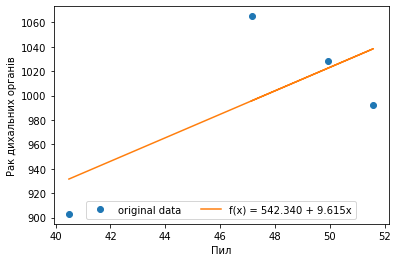

Пил-Рак дихальних органів regression

Intercept: 542.340
Slope: 9.615
R-square: 0.460
P-value: 0.322
Standard error: 7.373

----------------------------


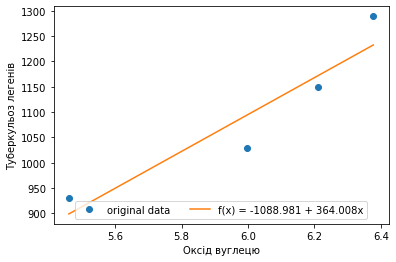

Оксід вуглецю-Туберкульоз легенів regression

Intercept: -1088.981
Slope: 364.008
R-square: 0.876
P-value: 0.064
Standard error: 96.993

----------------------------


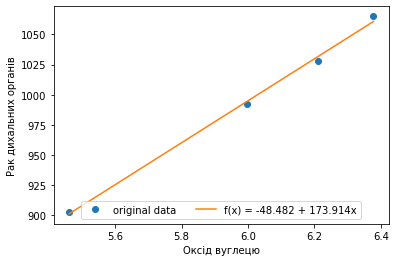

Оксід вуглецю-Рак дихальних органів regression

Intercept: -48.482
Slope: 173.914
R-square: 0.997
P-value: 0.001
Standard error: 6.651



In [14]:
for pair in suitable:
    x = set1[pair[0]]
    y = set2[pair[1]]
    regr = scipy.stats.linregress(x, y)
    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, regr.intercept + regr.slope*x, label=f'f(x) = {regr.intercept:.3f} + {regr.slope:.3f}x')
    plt.legend(loc='lower center', ncol=2)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    print("----------------------------")
    plt.show()
    
    print(f"{pair[0]}-{pair[1]} regression\n")
    print(f"Intercept: {regr.intercept:.3f}")
    print(f"Slope: {regr.slope:.3f}")
    print(f"R-square: {(regr.rvalue**2):.3f}")
    print(f"P-value: {regr.pvalue:.3f}")
    print(f"Standard error: {regr.stderr:.3f}")
    print()